### classification

In [0]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [10]:
mnist = tf.keras.datasets.mnist.load_data()
#(x_train, y_train),(x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Train on 6699 samples, validate on 3301 samples
Epoch 1/5
6699/6699 [==============================] - 4s 584us/sample - loss: 0.8545 - acc: 0.7595 - val_loss: 0.4858 - val_acc: 0.8740
Epoch 2/5
6699/6699 [==============================] - 4s 551us/sample - loss: 0.4249 - acc: 0.8779 - val_loss: 0.3765 - val_acc: 0.8973
Epoch 3/5
6699/6699 [==============================] - 4s 556us/sample - loss: 0.3362 - acc: 0.9080 - val_loss: 0.3418 - val_acc: 0.9043
Epoch 4/5
6699/6699 [==============================] - 5s 693us/sample - loss: 0.2934 - acc: 0.9194 - val_loss: 0.3265 - val_acc: 0.9106
Epoch 5/5
6699/6699 [==============================] - 5s 681us/sample - loss: 0.2608 - acc: 0.9272 - val_loss: 0.3052 - val_acc: 0.9155


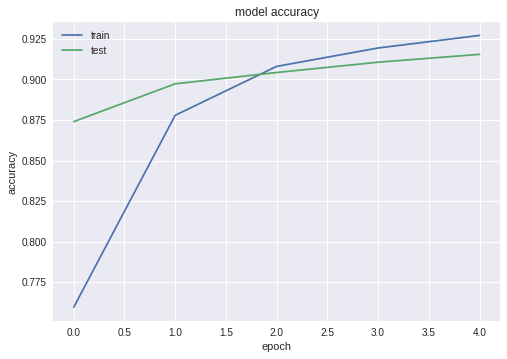

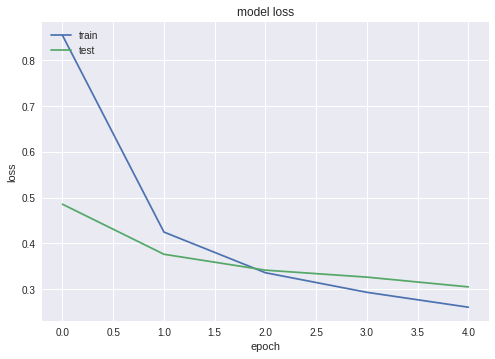

<Figure size 576x396 with 0 Axes>

In [16]:



train, test = mnist
all_xtrain, all_Ytrain = train
xtrain = all_xtrain[:10000]
Ytrain = all_Ytrain[:10000]
testX =test[0][:4000]
testY =test[1][:4000]
#xtrain = xtrain.reshape(-1,28*28) / 255
#print(xtrain.shape)
train_images = xtrain/ 255.0

test_images = testX / 255.0
#print(Ytrain)

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
     keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
opt=[keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0) ,keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)]

model.compile(optimizer='sgd' ,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])




hist =model.fit(train_images, Ytrain ,validation_split=0.33, epochs=5 ,batch_size=5)

#plt.figure()
#plt.imshow(testX[0])
#plt.colorbar()
#plt.grid(False)
#plt.show()
#print (testY)
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('acc_1.png')
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('loss_1.png')

In [0]:

#from sklearn.preprocessing import OneHotEncoder
#enc = OneHotEncoder(sparse = False,categories='auto')
#ytrain = enc.fit_transform(Ytrain.reshape(-1, 1))
#ytest = enc.transform(Ytest.reshape(-1, 1))


9